### ***• INSTALAÇÃO DE PACOTES:***

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install SQLAlchemy
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set_theme(style="whitegrid")

**-  Pacotes utilizados: scikit-learn, pandas, seaborn. matplotlib, numpy, SQLAlchemy, sqlite3.**

### ***• CARREGAMENTO DE PLANILHAS:***

In [ ]:
studentAssessment = pd.read_csv("studentAssessment.csv")
studentInfo = pd.read_csv("studentInfo.csv")
studentRegistration = pd.read_csv("studentRegistration.csv")
studentVle = pd.read_csv("studentVle.csv")

Planilhas utilizadas: studentAssessment,  studentInfo,  studentRegistration, studentVle.

### ***• VISUALIZAÇÃO DE PLANILHAS:***

In [ ]:
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [ ]:
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.00,NaN
1,AAA,2013J,28400,-53.00,NaN
2,AAA,2013J,30268,-92.00,12.00
3,AAA,2013J,31604,-52.00,NaN
4,AAA,2013J,32885,-176.00,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.00,NaN
32589,GGG,2014J,2645731,-23.00,NaN
32590,GGG,2014J,2648187,-129.00,NaN
32591,GGG,2014J,2679821,-49.00,101.00


In [ ]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.00
1,1752,28400,22,0,70.00
2,1752,31604,17,0,72.00
3,1752,32885,26,0,69.00
4,1752,38053,19,0,79.00
...,...,...,...,...,...
173907,37443,527538,227,0,60.00
173908,37443,534672,229,0,100.00
173909,37443,546286,215,0,80.00
173910,37443,546724,230,0,100.00


### ***• ARMAZENAMENTO DE DADOS CRUS (BRONZE):***

In [ ]:
engine = create_engine("sqlite:///lakehouse.db")

In [ ]:
studentInfo.to_sql("studentInfo_bronze", engine, if_exists="replace", index=False)
studentVle.to_sql("studentVle_bronze", engine, if_exists="replace", index=False)
studentRegistration.to_sql("studentRegistration_bronze", engine, if_exists="replace", index=False)
studentAssessment.to_sql("studentAssessment_bronze", engine, if_exists="replace", index=False)

173912

### ***• LIMPEZA DE DADOS:***

In [ ]:
studentInfo = studentInfo.dropna().drop_duplicates(subset='id_student')
studentVle = studentVle.dropna()
studentRegistration = studentRegistration.dropna()
studentAssessment = studentAssessment.dropna()

### ***• ARMAZENAMENTO DE DADOS LIMPOS (PRATA):***

In [ ]:
studentInfo.to_sql("studentInfo_silver", engine, if_exists="replace", index=False)
studentVle.to_sql("studentVle_silver", engine, if_exists="replace", index=False)
studentRegistration.to_sql("studentRegistration_silver", engine, if_exists="replace", index=False)
studentAssessment.to_sql("studentAssessment_silver", engine, if_exists="replace", index=False)

173739

### ***CRIAÇÃO DA MATRIZ DOS CLIQUES (CLICK_MATRIX) :***

In [ ]:
click_matrix = studentVle.pivot_table(
    index="id_student",
    columns="id_site",
    values="sum_click",
    aggfunc="sum",
    fill_value=0)

### ***• VALIDAÇÃO DE IDS:***

In [ ]:
valid_ids = click_matrix.index.intersection(studentInfo['id_student'].unique())
click_matrix = click_matrix.loc[valid_ids]
studentInfo_filtered = studentInfo.set_index('id_student').loc[valid_ids]


### ***• CRIAÇÃO DO TENSOR UTILIZANDO NUMPY :***

In [ ]:
tensor = click_matrix.to_numpy()
df_tensor = pd.DataFrame(tensor, index=click_matrix.index, columns=click_matrix.columns)
df_tensor['final_result'] = studentInfo_filtered['final_result']

***•  ANÁLISE EXPLORATÓRIA DE DADOS:***
---

### **- TOTAL DE ALUNOS**

- Visão Geral dos Dados Numéricos
- Distruibuição do Resultado Final  
- Participação Total por Região  
- Alunos em Regiões com Pobreza Superior a 50% (por País)  
- Total de Alunos com Deficiência (PCD)  
- Interações com o Ambiente Virtual de Aprendizagem (VLE) por Ano  
- Total de Alunos que Desistiram  

---
***• ESCOLHA ENTRE*** :
---



### **- APROVADOS**

- Visão Geral dos Aprovados    
- Distribuição por Gênero  
- Distribuição por Região  
- Aprovados em Regiões com Pobreza Superior a 50%  
- Aprovações na Primeira Tentativa

### **- REPROVADOS**

- Visão Geral dos Reprovados    
- Distribuição por Gênero  
- Distribuição por Região  
- Reprovados em Regiões com Pobreza Superior a 50%  
- Reprovações na Primeira Tentativa  

---

### **- CLIQUES**
- Relação de Alunos x Cliques
- Média de Clique Semanal por Total de Alunos
- Distruibuição de Cliques na Semana da Avaliação
- Soma Total de Cliques de Alunos por Semana


***•  MACHINE LEARNING:***
- Modelo de ML com RandomForest para prever sucesso (Pass/Distinction) vs não-sucesso (Fail/Withdraw).



   .


   .
   

   .

---
###                 ***• TOTAL DE ALUNOS***
---

### - Visão Geral dos Dados Numéricos  

In [ ]:
studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,"27,814.00","27,814.00","27,814.00"
mean,"707,818.65",0.12,78.67
std,"551,883.08",0.42,40.57
min,"3,733.00",0.00,30.00
25%,"507,288.75",0.00,60.00
50%,"590,249.50",0.00,60.00
75%,"646,313.75",0.00,120.00
max,"2,716,795.00",6.00,655.00


### -  Distribuição por Resultado Final

In [ ]:
studentInfo.groupby("final_result")["final_result"].value_counts().sort_values(ascending=False)

,count
final_result,
Pass,10371
Withdrawn,8833
Fail,6135
Distinction,2475


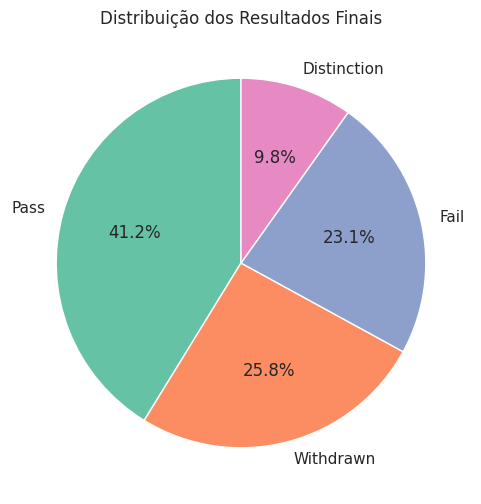

In [ ]:
plt.figure(figsize=(6,6))
df_tensor['final_result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribuição dos Resultados Finais')
plt.ylabel('')
plt.show()

### -  Participação Total por Região  

In [ ]:
studentInfo.groupby("region")["region"].value_counts().sort_values(ascending=False)

,count
region,
East Anglian Region,3000
Scotland,2926
London Region,2845
South Region,2694
North Western Region,2544
West Midlands Region,2235
South West Region,2149
East Midlands Region,2095
Wales,1876


/tmp/ipython-input-2377000233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


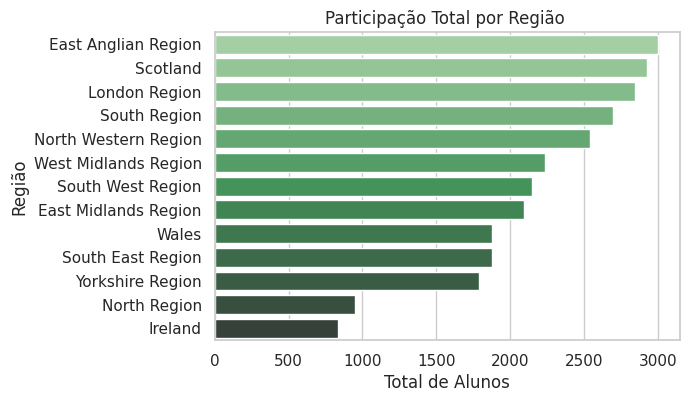

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(
data = studentInfo,
y = "region",
order = studentInfo["region"].value_counts().index,palette = "Greens_d"),
color="crimson"
plt.title("Participação Total por Região ")
plt.xlabel("Total de Alunos")
plt.ylabel("Região")
plt.show()

### - Alunos em Regiões com Pobreza Superior a 50% (por País)  

In [ ]:
studentInfo["imd_band"].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [ ]:
maior50 = ['50-60%','50-60%','60-70%','70-80%','80-90%','90-100%']
studentamaior50= studentInfo[studentInfo["imd_band"].isin(maior50)]
studentamaior50["id_student"].count()

np.int64(12520)

In [ ]:
studentamaior50.groupby("region")["region"].value_counts().sort_values(ascending=False)

,count
region,
South Region,1862
East Anglian Region,1787
Scotland,1494
South East Region,1087
South West Region,1034
East Midlands Region,972
Wales,803
West Midlands Region,756
North Western Region,739


/tmp/ipython-input-4204730138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


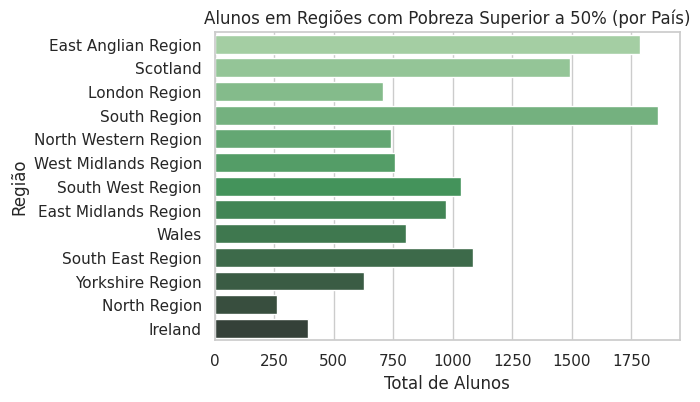

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(
data = studentamaior50,
y = "region",
order = studentInfo["region"].value_counts().index,palette = "Greens_d"),
color="crimson"
plt.title("Alunos em Regiões com Pobreza Superior a 50% (por País)")
plt.xlabel("Total de Alunos")
plt.ylabel("Região")
plt.show()

### - Total de Alunos com Deficiência (PCD)

In [ ]:
studentInfo[studentInfo["disability"] == "Y"].describe()

,id_student,num_of_prev_attempts,studied_credits
count,"2,688.00","2,688.00","2,688.00"
mean,"734,815.37",0.17,84.99
std,"609,002.64",0.50,49.34
min,"24,186.00",0.00,30.00
25%,"493,085.25",0.00,60.00
50%,"585,209.00",0.00,60.00
75%,"646,898.75",0.00,120.00
max,"2,698,109.00",5.00,655.00


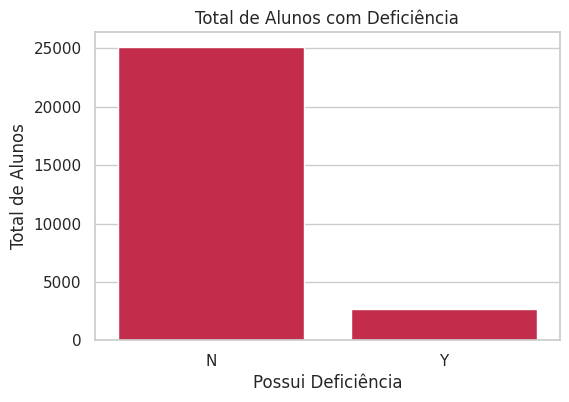

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
data = studentInfo,
x = "disability",
y = "id_student",
color="crimson",
estimator = len)
plt.title("Total de Alunos com Deficiência")
plt.xlabel("Possui Deficiência")
plt.ylabel("Total de Alunos")Q
plt.show()

### Interações com o Ambiente Virtual de Aprendizagem (VLE) por Ano

In [ ]:
studentVle["code_presentation"].unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [ ]:
studentVle.groupby("code_presentation")["sum_click"].count()

,sum_click
code_presentation,
2013B,1886868
2013J,2988784
2014B,2160176
2014J,3619452


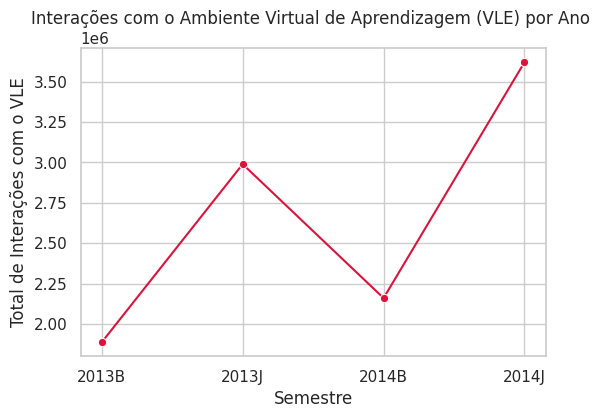

In [ ]:
df_year = studentVle.groupby("code_presentation")["sum_click"].count().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(
    data=df_year,
    x="code_presentation",
    y="sum_click",
    marker="o",
    color="crimson"
)

plt.title("Interações com o Ambiente Virtual de Aprendizagem (VLE) por Ano ")
plt.xlabel("Semestre")
plt.ylabel("Total de Interações com o VLE")
plt.show()

### - Total de Alunos que Desistiram  

In [ ]:
studentInfo["final_result"].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [ ]:
studentInfo.groupby("final_result")["final_result"].value_counts().sort_values(ascending=False)

,count
final_result,
Pass,10371
Withdrawn,8833
Fail,6135
Distinction,2475


In [ ]:
studentInfo[studentInfo["final_result"] == "Withdrawn"].describe()

,id_student,num_of_prev_attempts,studied_credits
count,"8,833.00","8,833.00","8,833.00"
mean,"707,913.34",0.13,89.52
std,"547,201.42",0.44,45.82
min,"3,733.00",0.00,30.00
25%,"510,435.00",0.00,60.00
50%,"592,158.00",0.00,60.00
75%,"648,654.00",0.00,120.00
max,"2,716,795.00",6.00,655.00


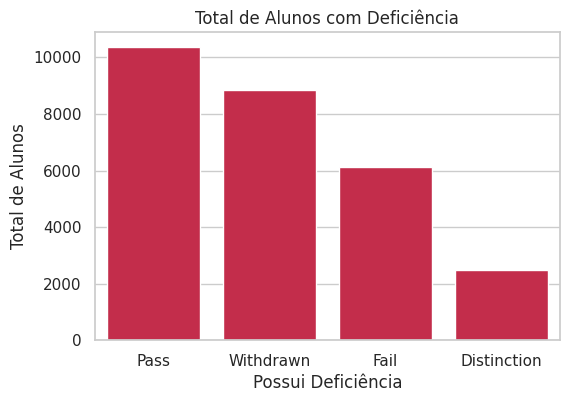

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
data = studentInfo,
x = "final_result",
y = "id_student",
color="crimson",
estimator = len)
plt.title("Total de Alunos com Deficiência")
plt.xlabel("Possui Deficiência")
plt.ylabel("Total de Alunos")
plt.show()

---
### ***• ESCOLHA PARA ANALISAR ENTRE OS ALUNOS:***
*   APROVADOS (Pass e Distinction)
*   REPROVADOS (Faill e Withdrawn)


---

In [ ]:
aprovados = studentInfo[(studentInfo["final_result"] == "Pass") | (studentInfo["final_result"] == "Distinction")]
reprovados = studentInfo[(studentInfo["final_result"] == "Fail") | (studentInfo["final_result"] == "Withdrawn")]
x = input("DIGITE 'APROVADOS' OU 'REPROVADOS': ").lower().strip()
if x == "aprovados":
  x = aprovados
elif x == "reprovados":
  x = reprovados
else:
  print("ERRO! Digite [APROVADOS] ou [REPROVADOS]")


### - Visão Geral dos Dados Numéricos **(APROVADOS ou REPROVADOS)**  

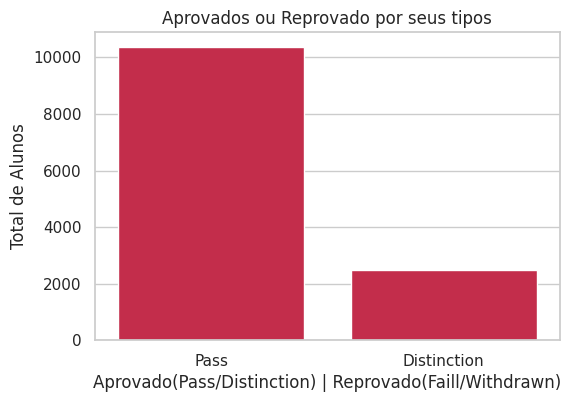

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
data = x,
x = "final_result",
y = "id_student",
color="crimson",
estimator = len)
plt.title("Aprovados ou Reprovado por seus tipos")
plt.xlabel("Aprovado(Pass/Distinction) | Reprovado(Faill/Withdrawn)")
plt.ylabel("Total de Alunos")
plt.show()

*   APROVADOS (Pass e Distinction)
*   REPROVADOS (Faill e Withdrawn)

In [ ]:
x.groupby("final_result")["final_result"].value_counts().sort_values(ascending=False)

,count
final_result,
Withdrawn,8833
Fail,6135


In [ ]:
x.describe()

,id_student,num_of_prev_attempts,studied_credits
count,"12,846.00","12,846.00","12,846.00"
mean,"723,872.24",0.09,73.13
std,"568,821.54",0.35,36.01
min,"6,516.00",0.00,30.00
25%,"510,230.00",0.00,60.00
50%,"592,942.50",0.00,60.00
75%,"648,842.50",0.00,90.00
max,"2,698,588.00",6.00,630.00


### -  Participação Total de **APROVADOS ou REPROVADOS** por Região

In [ ]:
x.groupby("region")["region"].value_counts().sort_values(ascending=False)

,count
region,
East Anglian Region,1457
Scotland,1414
South Region,1392
London Region,1201
South West Region,1069
North Western Region,1003
South East Region,959
East Midlands Region,951
West Midlands Region,939


In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(
data = x,
y = "region",
order = x["region"].value_counts().index,palette = "Greens_d"),
color="crimson"
plt.title("Participação Total de APROV. OU REPROV. por Região ")
plt.xlabel("Total de Aprovados ou Reprovados")
plt.ylabel("Região")
plt.show()

## **- Distribuição por Gênero**

In [ ]:
x.groupby("gender")["gender"].value_counts().sort_values(ascending=False)

,count
gender,
M,8019
F,6949


### - Alunos **APROVADOS ou REPROVADOS** em Regiões com Pobreza Superior a 50% (por País)  

In [ ]:
xx50 = ['50-60%','50-60%','60-70%','70-80%','80-90%','90-100%']
x50= x[x["imd_band"].isin(xx50)]
x50["id_student"].count()

np.int64(5987)

In [ ]:
x.groupby("region")["region"].value_counts().sort_values(ascending=False)

,count
region,
East Anglian Region,1457
Scotland,1414
South Region,1392
London Region,1201
South West Region,1069
North Western Region,1003
South East Region,959
East Midlands Region,951
West Midlands Region,939


/tmp/ipython-input-4001743816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


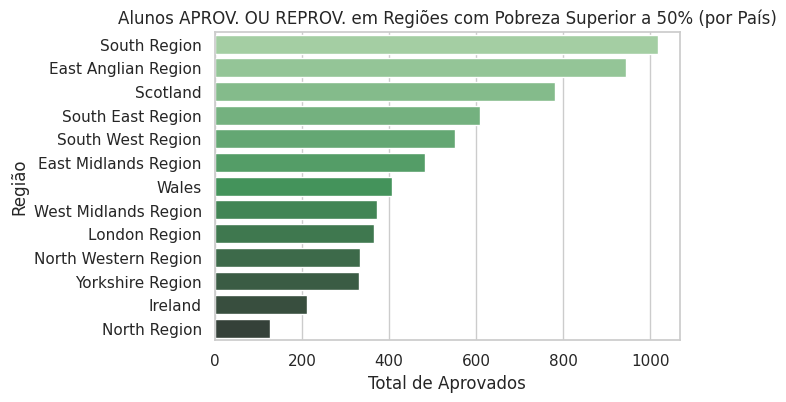

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(
data = x50,
y = "region",
order = x50["region"].value_counts().index,palette = "Greens_d"),
color="crimson"
plt.title("Alunos APROV. OU REPROV. em Regiões com Pobreza Superior a 50% (por País)")
plt.xlabel("Total de Aprovados")
plt.ylabel("Região")
plt.show()

### - Aprovações ou Reprovações na Primeira Tentativa (0)

In [ ]:
x.groupby("num_of_prev_attempts")["num_of_prev_attempts"].value_counts().sort_values(ascending=False)

,count
num_of_prev_attempts,
0,11932
1,751
2,128
3,23
4,10
5,1
6,1


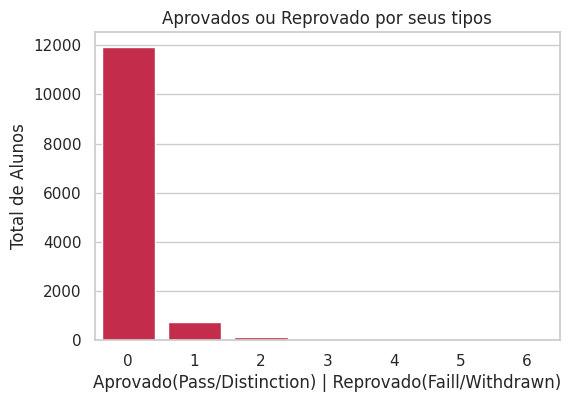

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
data = x,
x = "num_of_prev_attempts",
y = "num_of_prev_attempts",
color="crimson",
estimator = len)
plt.title("Aprovados ou Reprovado por seus tipos")
plt.xlabel("Aprovado(Pass/Distinction) | Reprovado(Faill/Withdrawn)")
plt.ylabel("Total de Alunos")
plt.show()

---
###                 ***• CLIQUES***
---

### - Relação de Alunos x Cliques

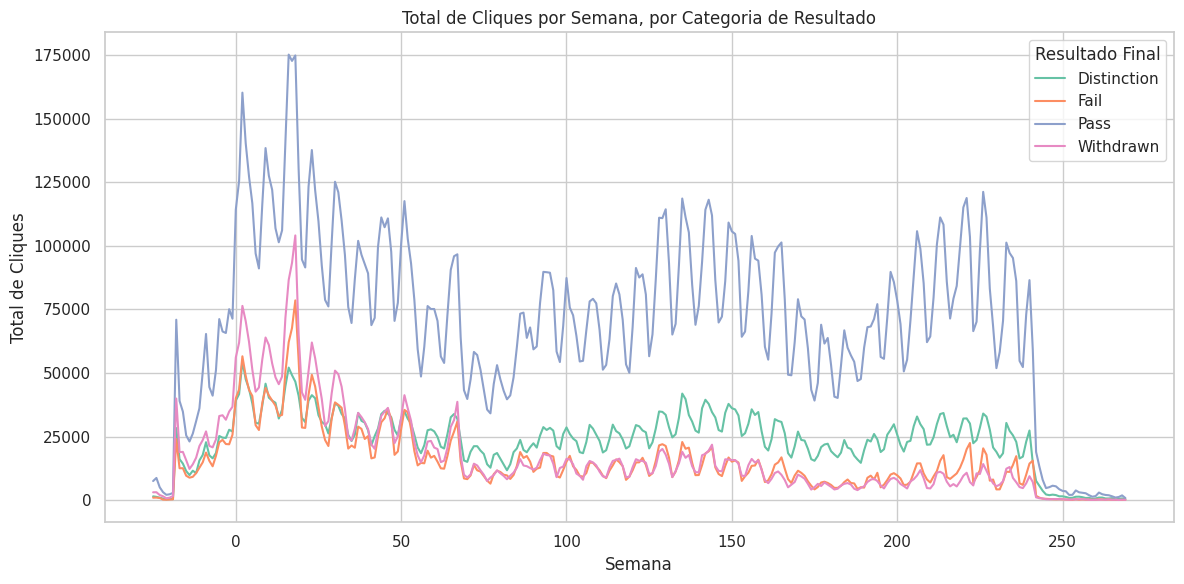

In [ ]:
studentVle_merged = studentVle.merge(studentInfo[['id_student', 'final_result']], on='id_student')
clicks_categoria= studentVle_merged.groupby(['date', 'final_result'])['sum_click'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=clicks_categoria, x='date', y='sum_click', hue='final_result', palette='Set2')
plt.title('Total de Cliques por Semana, por Categoria de Resultado')
plt.xlabel('Semana')
plt.ylabel('Total de Cliques')
plt.legend(title='Resultado Final')
plt.grid(True)
plt.tight_layout()
plt.show()


## - Média de Clique Semanal por Total de Alunos

In [ ]:
df_tensor.groupby('final_result').mean()

id_site,526721,526735,526737,526738,526739,526740,526741,526742,526743,526744,...,1016724,1019025,1042373,1042374,1042375,1042376,1046237,1046812,1046866,1049562
final_result,,,,,,,,,,,,,,,,,,,,,
Distinction,38.12,1.16,17.10,23.02,1.89,0.02,4.56,3.73,2.87,3.39,...,0.04,2.80,0.04,0.04,0.06,0.05,0.06,0.01,0.07,0.00
Fail,14.56,1.00,2.84,9.83,0.56,0.03,1.84,0.75,0.43,0.54,...,0.01,0.20,0.01,0.01,0.02,0.01,0.01,0.01,0.03,0.00
Pass,30.35,1.20,6.47,18.00,0.91,0.05,4.30,2.88,2.09,2.94,...,0.02,0.71,0.02,0.02,0.03,0.03,0.03,0.07,0.04,0.00
Withdrawn,7.68,0.70,2.12,5.90,0.32,0.02,0.38,0.14,0.09,0.11,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00


### - Distruibuição de Cliques na Semana da Avaliação

/tmp/ipython-input-3082768067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=semana_50, x='final_result', y='sum_click', palette='Set3')


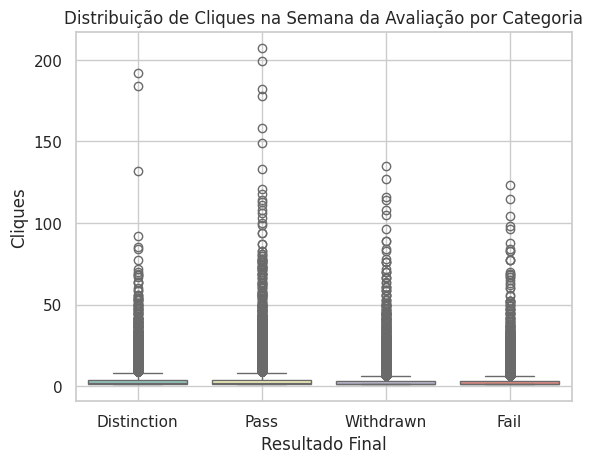

In [ ]:
semana_50 = studentVle_merged[studentVle_merged['date'] == 0]
sns.boxplot(data=semana_50, x='final_result', y='sum_click', palette='Set3')
plt.title('Distribuição de Cliques na Semana da Avaliação por Categoria')
plt.xlabel('Resultado Final')
plt.ylabel('Cliques')
plt.grid(True)
plt.show()



## - Soma Total de Cliques de Alunos por Semana

In [ ]:
clicks_por_semana = studentVle.groupby('date')['sum_click'].sum().sum()
clicks_por_semana

np.int64(39605099)

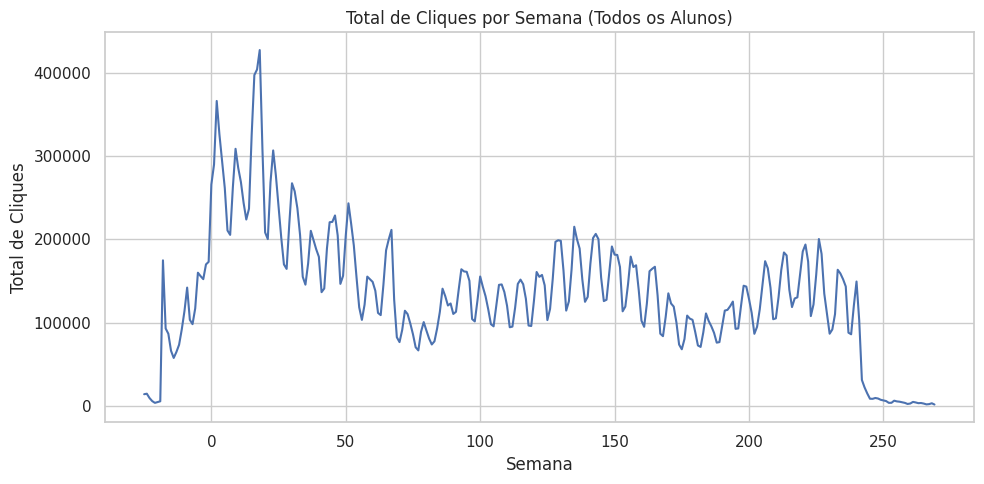

In [ ]:
clicks_por_semana = studentVle.groupby('date')['sum_click'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=clicks_por_semana.index, y=clicks_por_semana.values)
plt.title('Total de Cliques por Semana (Todos os Alunos)')
plt.xlabel('Semana')
plt.ylabel('Total de Cliques')
plt.grid(True)
plt.tight_layout()
plt.show()


### ***MACHINE LEARNING***

Modelo de Machine Learningcom RandomForest para prever sucesso (Pass/Distinction) vs não-sucesso
(Fail/Withdraw).

In [ ]:
X = df_tensor.drop(columns=['final_result'])
y = df_tensor['final_result'].map(lambda x: 1 if x in ['Pass', 'Distinction'] else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Relatório - Random Forest")
print(classification_report(y_test, y_pred_rf))

Relatório - Random Forest
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3738
           1       0.84      0.96      0.90      3807

    accuracy                           0.89      7545
   macro avg       0.90      0.89      0.89      7545
weighted avg       0.90      0.89      0.89      7545



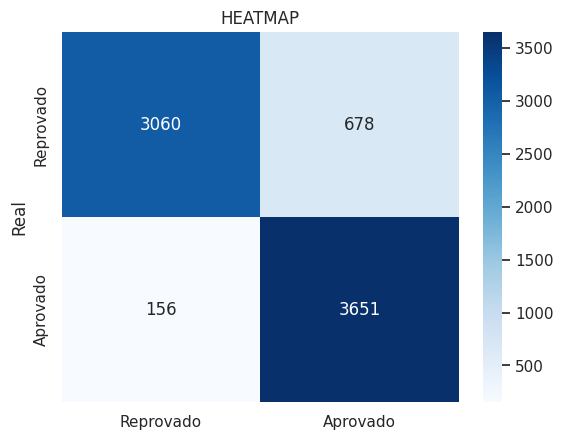

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Reprovado", "Aprovado"],
            yticklabels=["Reprovado", "Aprovado"])
plt.ylabel("Real")
plt.title("HEATMAP")
plt.show()

### ***• Armazenamento de Dados Analíticos no BANCO DE DADOS (OURO):***

In [ ]:
studentInfo.to_sql("studentInfo_gold", engine, if_exists="replace", index=False)
studentVle.to_sql("studentVle_gold", engine, if_exists="replace", index=False)
studentRegistration.to_sql("studentRegistration_gold", engine, if_exists="replace", index=False)
studentAssessment.to_sql("studentAssessment_gold", engine, if_exists="replace", index=False)

### ***INSIGHTS:***

- O número de alunos **aprovados** em regiões com mais de 50% de pobreza é **maior** do que o número de **reprovados** nessas mesmas regiões.  
- O número de **cliques** próximo à avaliação aumenta consideravelmente em todas as categorias de resultado final, mas é **ainda maior entre os alunos aprovados**.  
- Apesar de a **região da Irlanda** ter menos participantes do que a **North Region**, ela apresentou um número maior de aprovados. Vale destacar que também é a região com o **menor índice de pobreza** entre todas.  
- O número de cliques no **segundo semestre** do ano tende a ser maior do que no começo do ano, o que pode ser explicado por cursos que iniciam a partir de **julho**.  
- O número de **alunas aprovadas** é maior do que o de **alunos aprovados**, embora o total de alunos seja maior do que o total de alunas.  
- Entre os alunos que **não tiveram sucesso**, a grande maioria **desistiu** do curso, em vez de ser reprovada por desempenho.  
- **13.232** alunos foram reprovados na primeira tentativa, enquanto **11.932** foram aprovados na primeira tentativa.  
- Como o número de aprovados é maior que o de reprovados, o modelo de **Machine Learning Random Forest** tende a acertar mais os aprovados do que os reprovados. Isso explica por que a **acurácia para aprovados** apresenta um valor mais alto.  
